## PROJECT TITLE: **HANDWRITTEN DIGITS PREDICTIONS**
## PROJECT ID: **PRCP-1002**

### **PROJECT OVERVIEW**

- **Problem:** Classify images of handwritten digits.

- **Tasks:**
  - Task 1: Prepare a complete data analysis report on the given data.
  - Task 2: Build models to classify handwritten digits (0–9).
  - Task 3: Compare different models and identify the best one for production. 

## **IMPORTS**

In [1]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## **LOAD THE `MNIST` DATASET**

In [2]:
# load and split the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print("x_train Shape:", x_train.shape)
print("y_train Shape:", y_train.shape)
print("x_test Shape:", x_test.shape)
print("y_test Shape:", y_test.shape)

x_train Shape: (60000, 28, 28)
y_train Shape: (60000,)
x_test Shape: (10000, 28, 28)
y_test Shape: (10000,)


## **DATASET DESCRIPTION**

- `x_train`: Training images, shape `(60000, 28, 28)` – 60,000 grayscale images.
- `y_train`: Training labels, shape `(60000,)` – digit labels from 0 to 9.
- `x_test`: Test images, shape `(10000, 28, 28)`.
- `y_test`: Test labels, shape `(10000,)`.

Each image is 28x28 pixels, with pixel values between 0 and 255 (intensity).


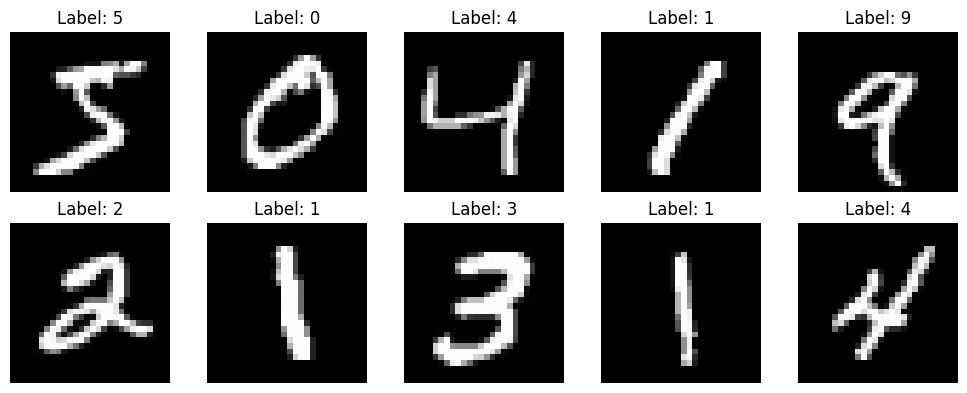

In [3]:
# Image Samples

plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [4]:
# Check distribution of classes in training set
unique, counts = np.unique(y_train, return_counts=True)
label_counts = dict(zip(unique, counts))
print("Label counts in training data:", label_counts)

Label counts in training data: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


## **DATA ANALYSIS REPORT**

Unique labels: [0 1 2 3 4 5 6 7 8 9]
Number of training samples: 60000
Number of test samples: 10000


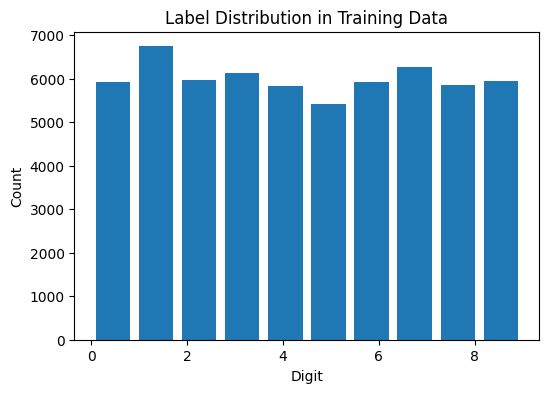

In [5]:
# Basic EDA

print("Unique labels:", np.unique(y_train))
print("Number of training samples:", len(x_train))
print("Number of test samples:", len(x_test))

# Plot label distribution
plt.figure(figsize=(6,4))
plt.hist(y_train, bins=10, rwidth=0.8)
plt.title("Label Distribution in Training Data")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.show()

## **PREPROCESSING: NORMALISATION (SCALING PIXEL VALUES TO [0, 1])**

In [6]:
# Preprocessing

# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Reshape to (n_samples, 28, 28, 1) for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test  = x_test.reshape(-1, 28, 28, 1)

print("x_train reshaped:", x_train.shape)
print("x_test reshaped:", x_test.shape)

# One-hot encode labels for softmax
num_classes = 10
y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("y_train_cat shape:", y_train_cat.shape)
print("y_test_cat shape:", y_test_cat.shape)

x_train reshaped: (60000, 28, 28, 1)
x_test reshaped: (10000, 28, 28, 1)
y_train_cat shape: (60000, 10)
y_test_cat shape: (10000, 10)


## **CREATING MODEL**

In [7]:
# Simple CNN

def create_simple_cnn(input_shape=(28, 28, 1), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),

        # Output layer with Softmax (as you requested)
        Dense(num_classes, activation='softmax')
    ])
    return model

model1 = create_simple_cnn()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

## **COMPLING THE MODEL**

In [8]:
# Compile Model

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

## **TRAIN MODEL**

In [9]:
# Train Model

history1 = model1.fit(
    x_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10
422/422 [==============================] - 35s 77ms/step - loss: 0.3096 - accuracy: 0.9044 - val_loss: 0.0623 - val_accuracy: 0.9812
Epoch 2/10
422/422 [==============================] - 32s 77ms/step - loss: 0.1002 - accuracy: 0.9711 - val_loss: 0.0435 - val_accuracy: 0.9868
Epoch 3/10
422/422 [==============================] - 38s 90ms/step - loss: 0.0748 - accuracy: 0.9778 - val_loss: 0.0363 - val_accuracy: 0.9898
Epoch 4/10
422/422 [==============================] - 36s 85ms/step - loss: 0.0595 - accuracy: 0.9824 - val_loss: 0.0334 - val_accuracy: 0.9895
Epoch 5/10
422/422 [==============================] - 38s 91ms/step - loss: 0.0492 - accuracy: 0.9851 - val_loss: 0.0337 - val_accuracy: 0.9908
Epoch 6/10
422/422 [==============================] - 37s 88ms/step - loss: 0.0431 - accuracy: 0.9872 - val_loss: 0.0374 - val_accuracy: 0.9903
Epoch 7/10
422/422 [==============================] - 35s 83ms/step - loss: 0.0394 - accuracy: 0.9877 - val_loss: 0.0336 - val_accuracy:

## **EVALAUTE MODEL**

In [14]:
# Cell 8: Evaluate Model 1 on Test Data

test_loss1, test_acc1 = model1.evaluate(x_test, y_test_cat, verbose=0)
print("Model 1 - Simple CNN")
print("Test Loss:", test_loss1)
print("Test Accuracy:", test_acc1)

Model 1 - Simple CNN
Test Loss: 0.02299259416759014
Test Accuracy: 0.9919999837875366


## **PLOT ACCURACY & LOSS CURVES**

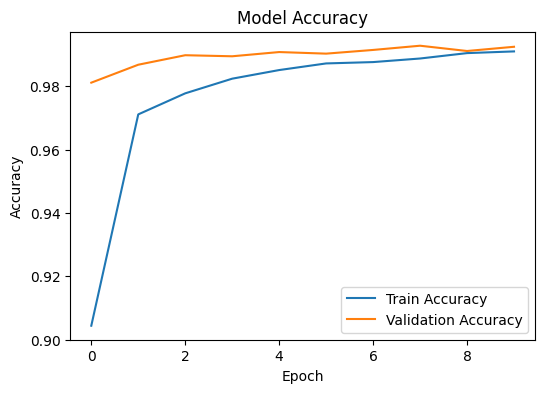

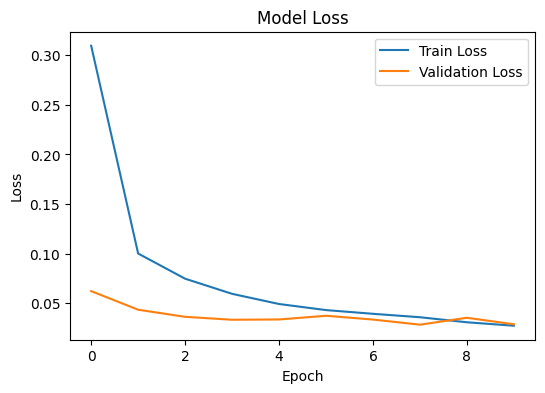

In [15]:
# Plot training & validation curves for Model

# Accuracy plot
plt.figure(figsize=(6,4))
plt.plot(history1.history['accuracy'], label='Train Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.figure(figsize=(6,4))
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## **CONFUSION MATRIX AND CLASSIFICATION REPORT**

313/313 [==============================] - 3s 10ms/step
Classification Report for Model:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



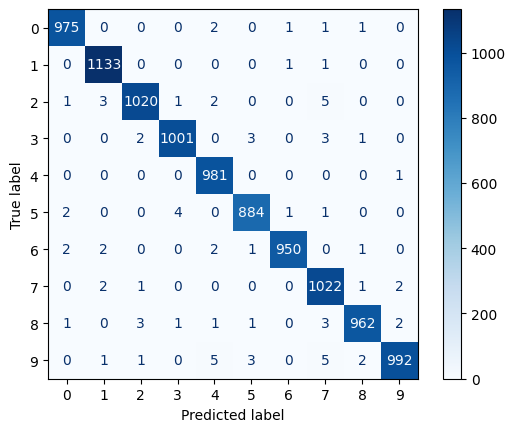

In [16]:
# Confusion matrix & classification report for Model

# Predictions
y_pred_prob1 = model1.predict(x_test)
y_pred1 = np.argmax(y_pred_prob1, axis=1)

print("Classification Report for Model:")
print(classification_report(y_test, y_pred1))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred1)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## **SAVE THE MODEL**

In [17]:
final_model = model1

model_name = "hand-written-digits-prediction.keras"

#save the model
final_model.save(model_name)

print("Model saved as", model_name)

Model saved as hand-written-digits-prediction.keras


## **REPORT ON CHALLENGE FACED**
The main challenges were confusing similar digits (like 4 vs 9) and preventing overfitting during training. Normalization, dropout layers, and validation monitoring were used to improve accuracy and stability. These techniques helped the model learn more general patterns and perform better on unseen data.